<a href="https://colab.research.google.com/github/douglasmmachado/ExploratoryDataAnalysis/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import Normalizer

# Data loading and visualization

We have a total of 75692 entries and 21 columns, but we can see that there is missing values in some columns. Also, categorical features such as ID_REF could be written as strings and not as objects for future data manipulations.

In [64]:
raw_data_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/project_database.csv"
df=pd.read_csv(raw_data_url, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75692 entries, 0 to 75691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            75689 non-null  object 
 1   ID_SITE_RATTACHE  75690 non-null  object 
 2   CODE_ATC          75685 non-null  object 
 3   HOSPI_CODE_UCD    75690 non-null  object 
 4   DATE_MOUV         75685 non-null  object 
 5   N_UFS             75692 non-null  int64  
 6   QUANTITY          75685 non-null  float64
 7   WEEK              75685 non-null  float64
 8   MONTH             75692 non-null  int64  
 9   YEAR              75685 non-null  float64
 10  N_ETB             75692 non-null  int64  
 11  POPULATION        75692 non-null  float64
 12  P_MEDICAL         75692 non-null  int64  
 13  PN_MEDICAL        75692 non-null  int64  
 14  LIT_HC            75685 non-null  float64
 15  LIT_HP            75692 non-null  float64
 16  SEJ_MCO           75692 non-null  int64 

<ipython-input-64-5fa22cf758ba>:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(raw_data_url, index_col=0)


In [65]:
'''
From: Correlation analysis of factor impacting health
product consumption in French hospitals

12 main factors:
01 - Size population
02 - Number of physicians for consultations and hospitalization
03 - The number of beds
04 - The Number of medical visits or patient
05 - Facilities geographic position
06 - Type of health facilities
07 - Number of health facilities
08 - Seasonal factors
09 - Number of department or medical unit
10 - Number non-medical Staff (nurses, administration, …)
11 - Medical Specialist (health workers characteristics)
12 - Type of medical department


Table of attributes:
00 - ID_SITE - HOSPITAL_ID
01 - ID_REF - DRUG ID PER HOSPITAL
02 - DESIG - Drug Name
03 - CODE_UCD - Drug UCD code
04 - CODE_DEPT - Hospital district
05 - YEARS - Year of consumption
06 - MONTH - Month of consumption
07 - N_ETB - Numbers of hospital facilities
08 - N_UFS - Numbers of hospital medical units
09 - LIT_HC - Numbers of beds for full hospitalization
10 - LTT_HP - Numbers of beds for partial hospitalization
11 - SEJ_MCO - Numbers of visits in MCO departments
12 - SEJ_HAD - Numbers of visits in HAD departments
13 - SEJ_SLD - Numbers of visits in SLD departments
14 - SEJ_PSY - Numbers of visits in PSY departments
15 - PN_MEDICAL - Numbers of other staff (nurses; midwife)
16 - P_MEDICAL - Numbers of physician
17 - POPULATION - Number of population in the district

'''
df.sample(10)

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
24458,9387549,HOSPI_2,N02BE01,3400893875490,2017-06-08,2,80.0,23.0,6,2017.0,...,539067.0,714,5001,1157.0,187.0,75420,0,1236,261,0
13794,841268,HOSPI_1,A03AX12,3400893736135,2016-04-12,6,100.0,15.0,4,2016.0,...,572744.0,683,5273,1388.0,105.0,78311,0,0,1177,51
54962,506197,HOSPI_3,A03AX12,3400893736135,2015-11-18,9,260.0,47.0,11,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
30830,9274584,HOSPI_2,R03AC02,3400892745848,2018-06-20,10,350.0,25.0,6,2018.0,...,541454.0,703,5007,1159.0,139.0,74663,0,1193,237,0
32192,9373613,HOSPI_2,A03AX12,3400893736135,2018-04-04,15,340.0,14.0,4,2018.0,...,541454.0,703,5007,1159.0,139.0,74663,0,1193,237,0
39796,507146,HOSPI_3,A12BA01,3400891225037,2015-03-12,4,370.0,11.0,3,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
25017,9387549,HOSPI_2,N02BE01,3400893875490,2019-04-30,13,320.0,18.0,4,2019.0,...,542302.0,706,5013,1141.0,141.0,76593,0,1007,206,0
720,960148,HOSPI_1,N02BE01,3400891996128,2016-03-31,10,610.0,13.0,3,2016.0,...,572744.0,683,5273,1388.0,105.0,78311,0,0,1177,51
10731,830303,HOSPI_1,N05CF01,3400891191226,2016-02-10,1,170.0,6.0,2,2016.0,...,572744.0,683,5273,1388.0,105.0,78311,0,0,1177,51
37849,9302263,HOSPI_2,J01CR05,3400893022634,2018-12-29,1,8.0,52.0,12,2018.0,...,541454.0,703,5007,1159.0,139.0,74663,0,1193,237,0


In [66]:
duplicateRows = df[df.duplicated()]
duplicateRows

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
9468,890264,HOSPI_1,N02AX02,3400892729589,2016-01-01,1,10.0,53.0,1,2016.0,...,572744.0,683,5273,1388.0,105.0,78311,0,0,1177,51


In [67]:
#Drop duplicates
df = df.drop_duplicates()

## Data comprehension, changing datatype and removing missing data

In [68]:
def display_unique(df, features):
  for column in features:
    print(f'\n Unique values of feature: {column}')
    print(df[column].unique())
    print('\n')

In [69]:
categorical_features = ['ID_REF', 'ID_SITE_RATTACHE', 'CODE_ATC', 'HOSPI_CODE_UCD']
date_features = ['DATE_MOUV', 'WEEK', 'MONTH', 'YEAR']
numerical_features = ['N_UFS', 'QUANTITY', 'N_ETB', 'POPULATION', 'P_MEDICAL', 'PN_MEDICAL', 'LIT_HC', 'LIT_HP', 'SEJ_MCO', 'SEJ_HAD', 'SEJ_PSY', 'SEJ_SSR'] 

In [70]:
display_unique(df, categorical_features)


 Unique values of feature: ID_REF
[960148 893880 960491 800851 820070 800852 890228 830701 890264 830303
 891086 840051 841268 830631 960229 890900 960388 960687 830302 822707
 810359 9199612 9122503 9387549 9276152 9266923 9276169 9206536 9083714
 9272958 9119122 9274584 9220364 9373613 9207576 '9207576' '9382670'
 '9269778' '9250856' '9205212' '9123520' '9208831' '9302263' nan 'X' 'Z'
 '00' '2345' '503129' '507146' '503386' '525441' '502400' '525443'
 '502369' '504394' '503182' '504200' '509929' '507071' '506197' '504495'
 '525057' '503095' '502829' '503184' '504403' '502374' '501463' 501463
 2463 5268 20395 7047 8704 7046 9490 3937 5186 20677 20420 8927 20845 2431
 5589 5066 5671 5193 2612 6180 21099]



 Unique values of feature: ID_SITE_RATTACHE
['HOSPI_1' 'HOSPI_2' nan 'HOSPI_3' 'HOSPI_4']



 Unique values of feature: CODE_ATC
['N02BE01' 'A12BA01' 'B05XA03' 'B01AB05' 'B01AC06' 'N05BA04' 'N02AX02'
 'N05CF01' 'R03AC02' 'H02AB06' 'A03AX12' 'N05BA12' 'B05XA09' 'M03BX01'
 'C01CA03' 

In [71]:
#This two rows are almost full of missing data, the best approach would be remove them
df[df['ID_SITE_RATTACHE'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37844,Z,NaN,NaN,NaN,NaN,14,NaN,NaN,12,NaN,...,12.0,14,14,NaN,12.0,12,14,14,12,12
37845,00,NaN,NaN,NaN,NaN,1,NaN,NaN,1236987,NaN,...,1236987.0,1,1,NaN,1236987.0,1236987,1,1,1236987,1236987


In [72]:
df = df.dropna(subset=['ID_SITE_RATTACHE'])

In [73]:
df[df['ID_REF'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37842,NaN,HOSPI_2,NaN,AZU,NaN,10,NaN,NaN,147,NaN,...,147.0,10,10,NaN,147.0,147,10,10,147,147
37846,NaN,HOSPI_3,NaN,45f,NaN,0,NaN,NaN,45,NaN,...,45.0,0,0,NaN,45.0,45,0,0,45,45
37847,NaN,HOSPI_1,NaN,45,NaN,6,NaN,NaN,23,NaN,...,23.0,6,6,NaN,23.0,23,6,6,23,23


In [74]:
df = df.dropna(subset=['ID_REF'])

In [75]:
df[df['CODE_ATC'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37843,X,HOSPI_1,NaN,3333#,NaN,56,NaN,NaN,4578975,NaN,...,4578975.0,56,56,NaN,4578975.0,4578975,56,56,4578975,4578975
37848,2345,HOSPI_4,NaN,GHAtvw,NaN,81,NaN,NaN,789,NaN,...,789.0,81,81,NaN,789.0,789,81,81,789,789


In [76]:
df = df.dropna(subset=['CODE_ATC'])

In [77]:
df[df['HOSPI_CODE_UCD'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD


In [78]:
'''
  We can notice that all missing values from categorical features were removed, also, some strange
  values that were different from the rest were removed, leading to an understanding of 
  wrong inputs in database

  Also, we can notice that for the categorical features, the problem of type persists, as
  some values are numbers and other are strings, to solve that I'm going to convert
  all to strings
'''
display_unique(df, categorical_features)


 Unique values of feature: ID_REF
[960148 893880 960491 800851 820070 800852 890228 830701 890264 830303
 891086 840051 841268 830631 960229 890900 960388 960687 830302 822707
 810359 9199612 9122503 9387549 9276152 9266923 9276169 9206536 9083714
 9272958 9119122 9274584 9220364 9373613 9207576 '9207576' '9382670'
 '9269778' '9250856' '9205212' '9123520' '9208831' '9302263' '503129'
 '507146' '503386' '525441' '502400' '525443' '502369' '504394' '503182'
 '504200' '509929' '507071' '506197' '504495' '525057' '503095' '502829'
 '503184' '504403' '502374' '501463' 501463 2463 5268 20395 7047 8704 7046
 9490 3937 5186 20677 20420 8927 20845 2431 5589 5066 5671 5193 2612 6180
 21099]



 Unique values of feature: ID_SITE_RATTACHE
['HOSPI_1' 'HOSPI_2' 'HOSPI_3' 'HOSPI_4']



 Unique values of feature: CODE_ATC
['N02BE01' 'A12BA01' 'B05XA03' 'B01AB05' 'B01AC06' 'N05BA04' 'N02AX02'
 'N05CF01' 'R03AC02' 'H02AB06' 'A03AX12' 'N05BA12' 'B05XA09' 'M03BX01'
 'C01CA03' 'N05CF02' 'C03CA01' 'J01CR05

In [79]:
for column in categorical_features:
  df[column] = df[column].astype('string')

df['DATE_MOUV'] = pd.to_datetime(df['DATE_MOUV'], 
               format='%Y-%m-%d')  # Changed the type of date too
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75684 entries, 0 to 75691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            75684 non-null  string        
 1   ID_SITE_RATTACHE  75684 non-null  string        
 2   CODE_ATC          75684 non-null  string        
 3   HOSPI_CODE_UCD    75684 non-null  string        
 4   DATE_MOUV         75684 non-null  datetime64[ns]
 5   N_UFS             75684 non-null  int64         
 6   QUANTITY          75684 non-null  float64       
 7   WEEK              75684 non-null  float64       
 8   MONTH             75684 non-null  int64         
 9   YEAR              75684 non-null  float64       
 10  N_ETB             75684 non-null  int64         
 11  POPULATION        75684 non-null  float64       
 12  P_MEDICAL         75684 non-null  int64         
 13  PN_MEDICAL        75684 non-null  int64         
 14  LIT_HC            7568

<ipython-input-79-f08944d88711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('string')
<ipython-input-79-f08944d88711>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_MOUV'] = pd.to_datetime(df['DATE_MOUV'],


In [80]:
df.sample(2)

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
8022,830701,HOSPI_1,N05BA04,3400890837149,2014-07-03,1,50.0,27.0,7,2014.0,...,571632.0,684,5321,1418.0,151.0,71879,0,0,1194,79
46874,502369,HOSPI_3,B01AC06,3400892065366,2015-03-13,11,310.0,11.0,3,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75


## Handling outliers

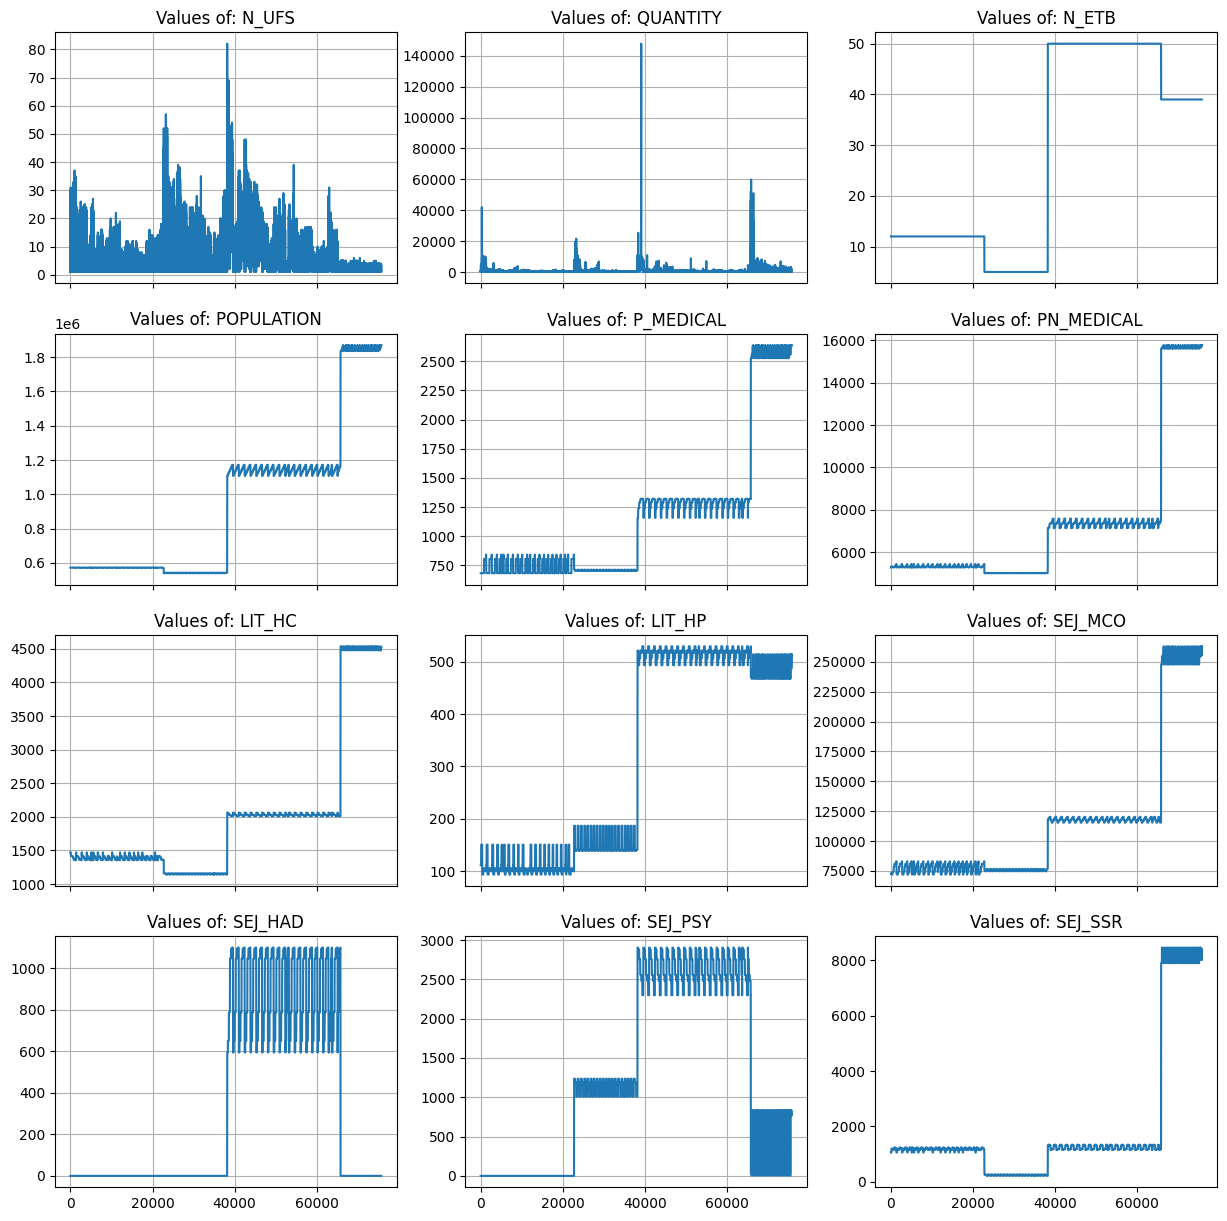

In [81]:

fig, axs = plt.subplots(4, 3, sharex=True, figsize = (15,15))

i = 0
j = 0

for column in numerical_features:
  axs[i, j].plot(df[column])
  axs[i, j].set_title('Values of: ' + str(column))
  axs[i, j].grid(True)
  plt.grid()
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1
  
  

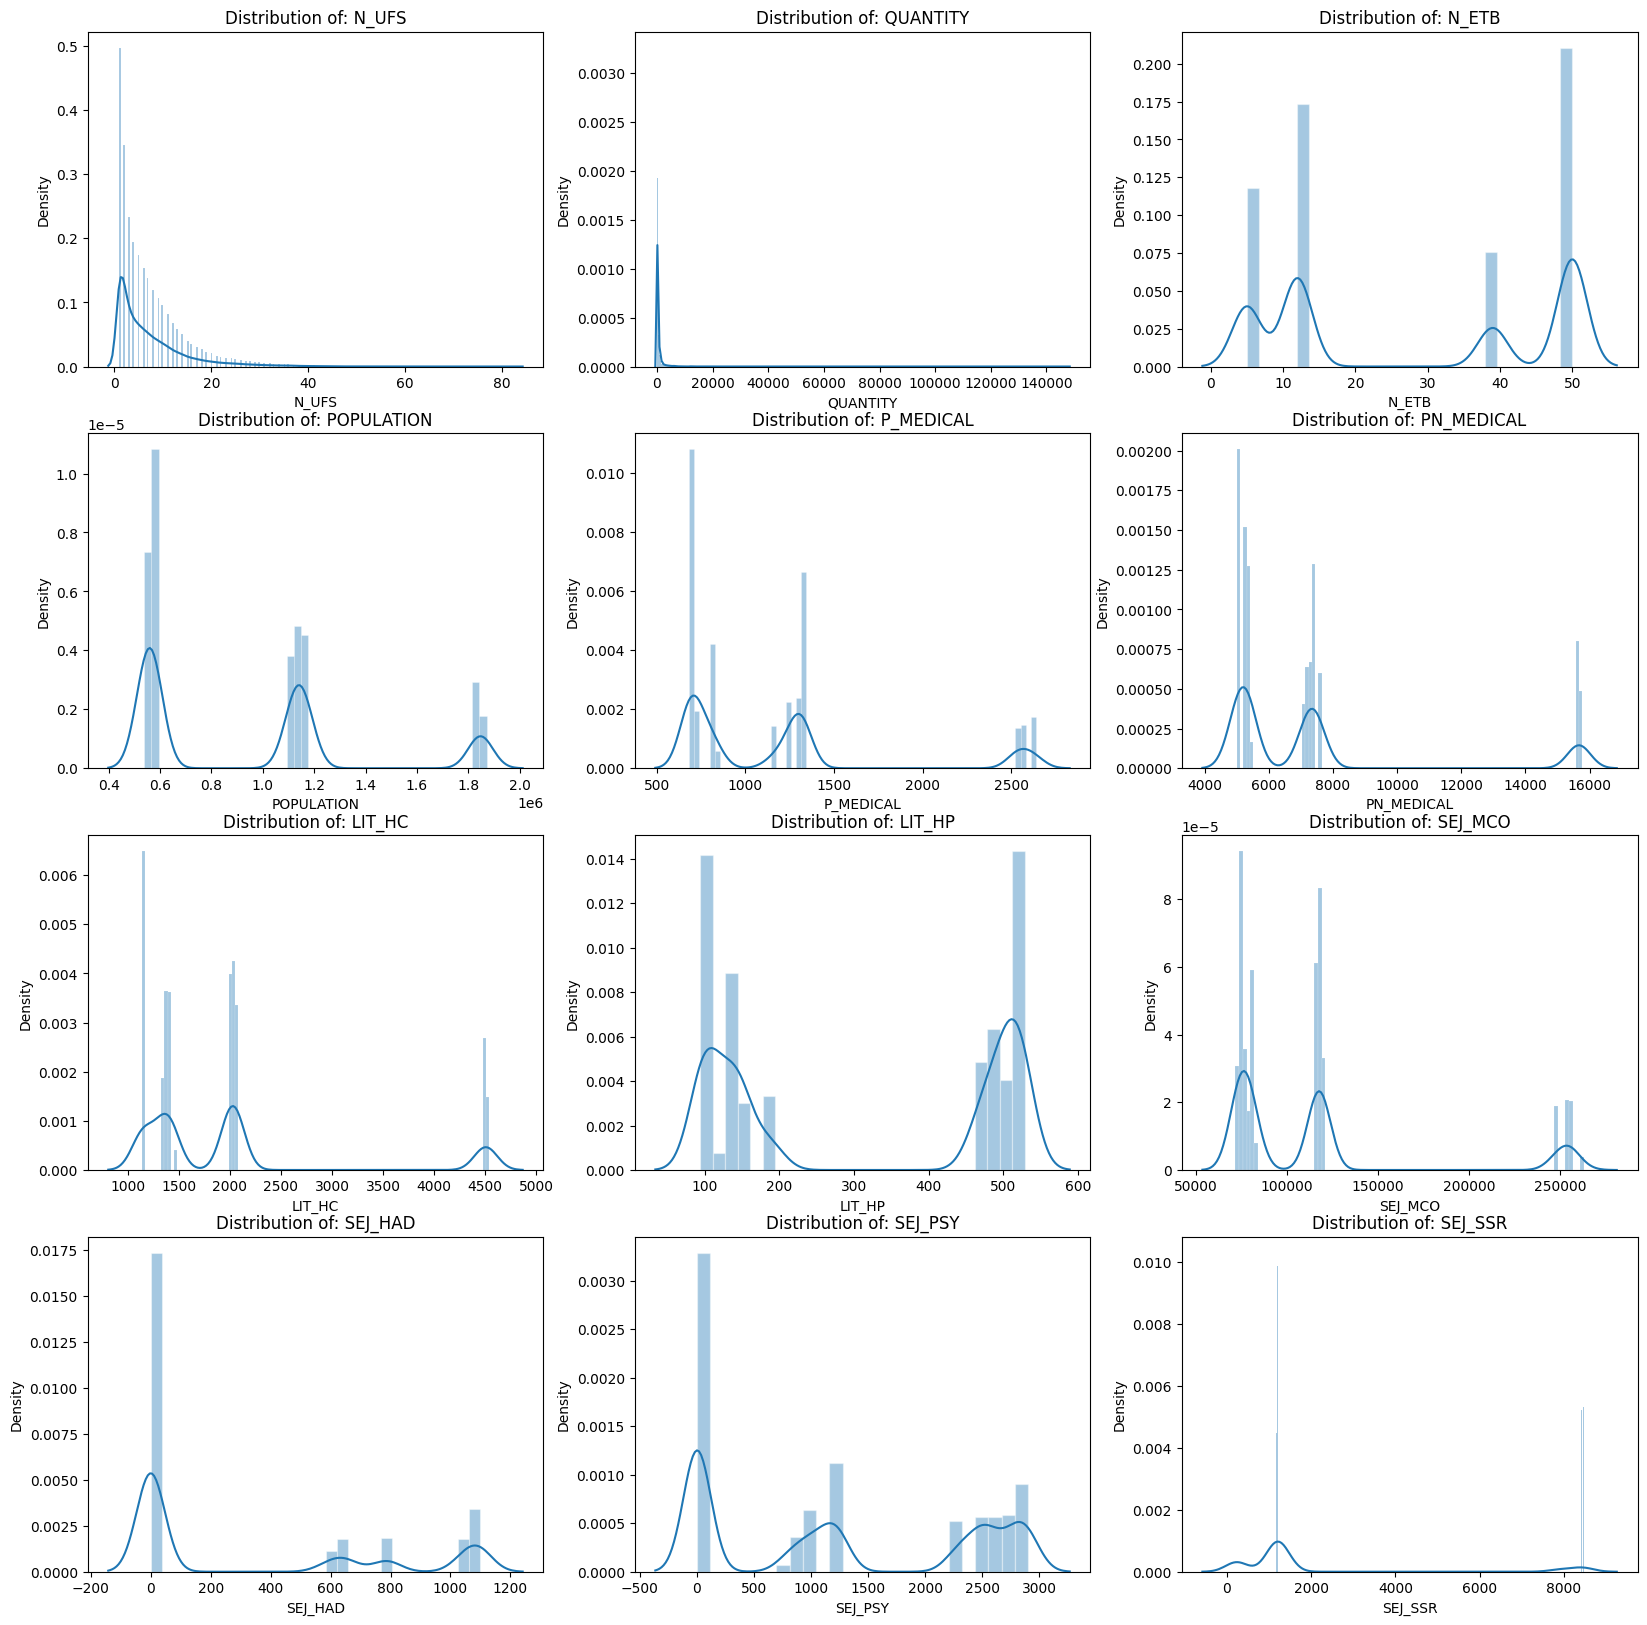

In [82]:
'''
  Plot of distribution for the numerical features before removing the outliers
'''

fig, axes = plt.subplots(4, 3,sharex=False, figsize=(20,20))

i = 0
j = 0
for column in numerical_features:
  sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),ax=axes[i, j]).set(title='Distribution of: ' + str(column))
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1

In [175]:
for column in numerical_features:
  zeros = (df[column] == 0).sum()
  print(f'Column: {column}' + f' number of zeros: {zeros}')

Column: N_UFS number of zeros: 0
Column: QUANTITY number of zeros: 4
Column: N_ETB number of zeros: 0
Column: POPULATION number of zeros: 0
Column: P_MEDICAL number of zeros: 0
Column: PN_MEDICAL number of zeros: 0
Column: LIT_HC number of zeros: 0
Column: LIT_HP number of zeros: 0
Column: SEJ_MCO number of zeros: 0
Column: SEJ_HAD number of zeros: 46797
Column: SEJ_PSY number of zeros: 22602
Column: SEJ_SSR number of zeros: 0


In [83]:
'''
  For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
  It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
  all(axis=1) ensures that for each row, all column satisfy the constraint.
  Finally, the result of this condition is used to index the dataframe.

  Z-score:

  Simply put, a z-score (also called a standard score) gives you an idea of how far from the
  mean a data point is. But more technically it’s a measure of how many standard deviations
  below or above the population mean a raw score is.
'''
for column in numerical_features:
  df = df[(np.abs(stats.zscore(df[column])) < 3)]

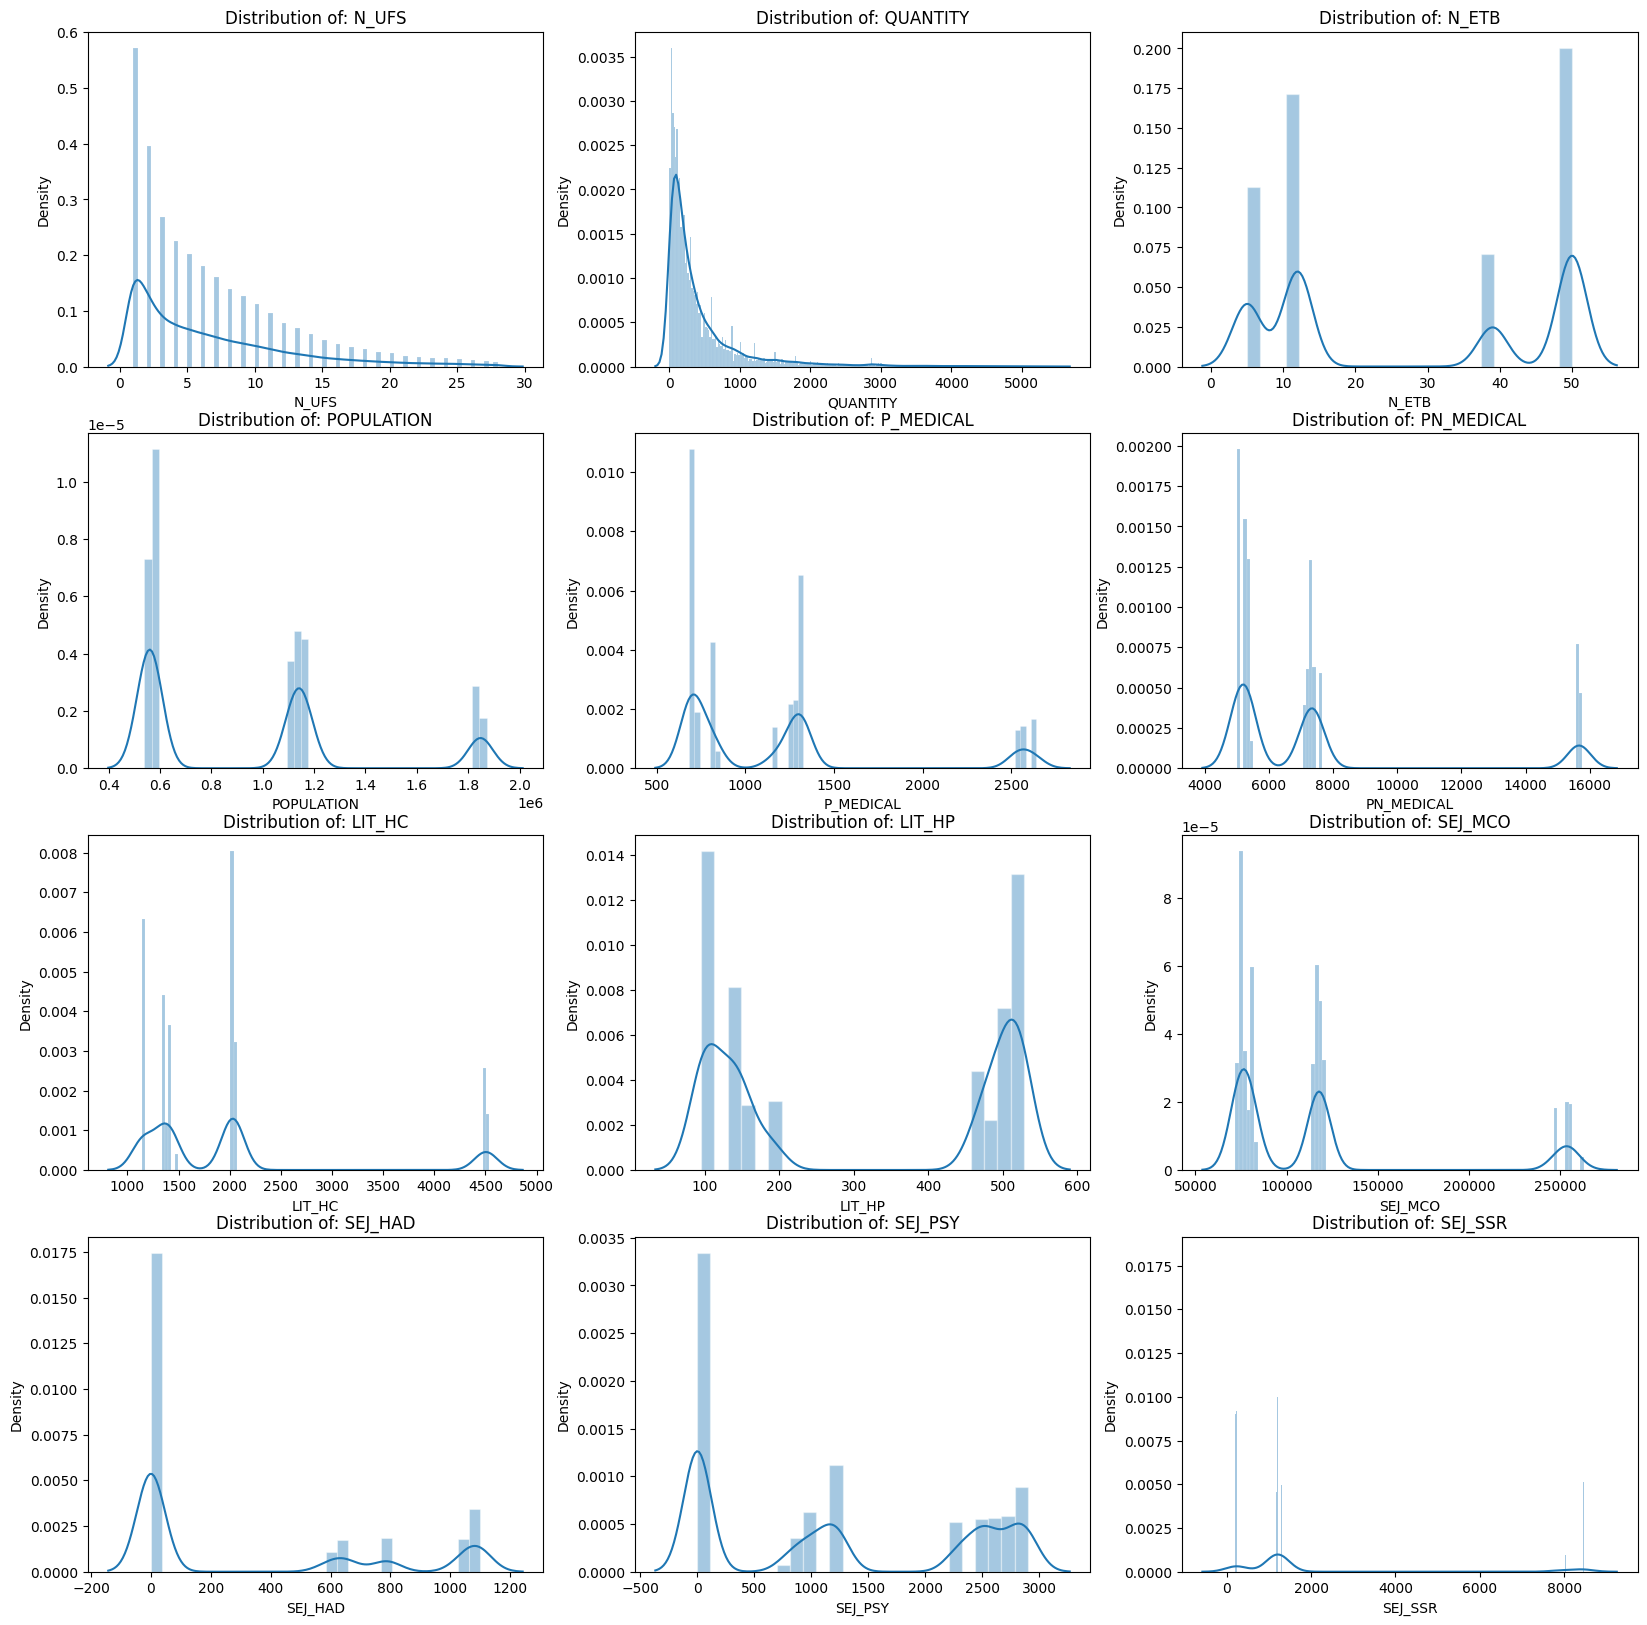

In [84]:
'''
  Plot of distribution for the numerical features after removing the outliers
'''

fig, axes = plt.subplots(4, 3,sharex=False, figsize=(20,20))

i = 0
j = 0
for column in numerical_features:
  sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),ax=axes[i, j]).set(title='Distribution of: ' + str(column))
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1

# Correlation analysis


<ipython-input-85-1f1b17f16482>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

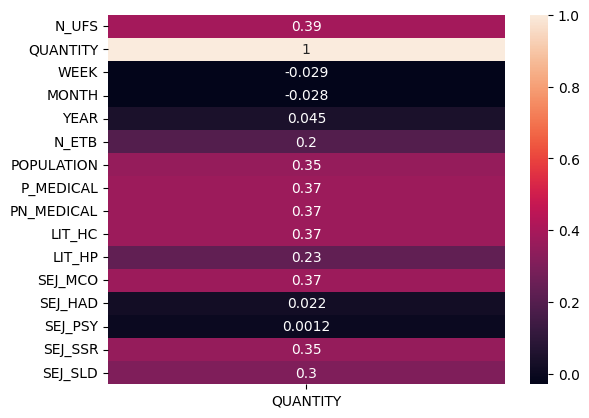

In [85]:
corr = df.corr()
x = corr[['QUANTITY']]
sns.heatmap(x,annot=True)

In [86]:
#sns.pairplot(df, kind="scatter", hue="ID_SITE_RATTACHE", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()

# Modifying the categorical features into numerical

<ipython-input-87-c127c709afe8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)
<ipython-input-87-c127c709afe8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)
<ipython-input-87-c127c709afe8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)
<ipython-input-87-c127c709afe8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)


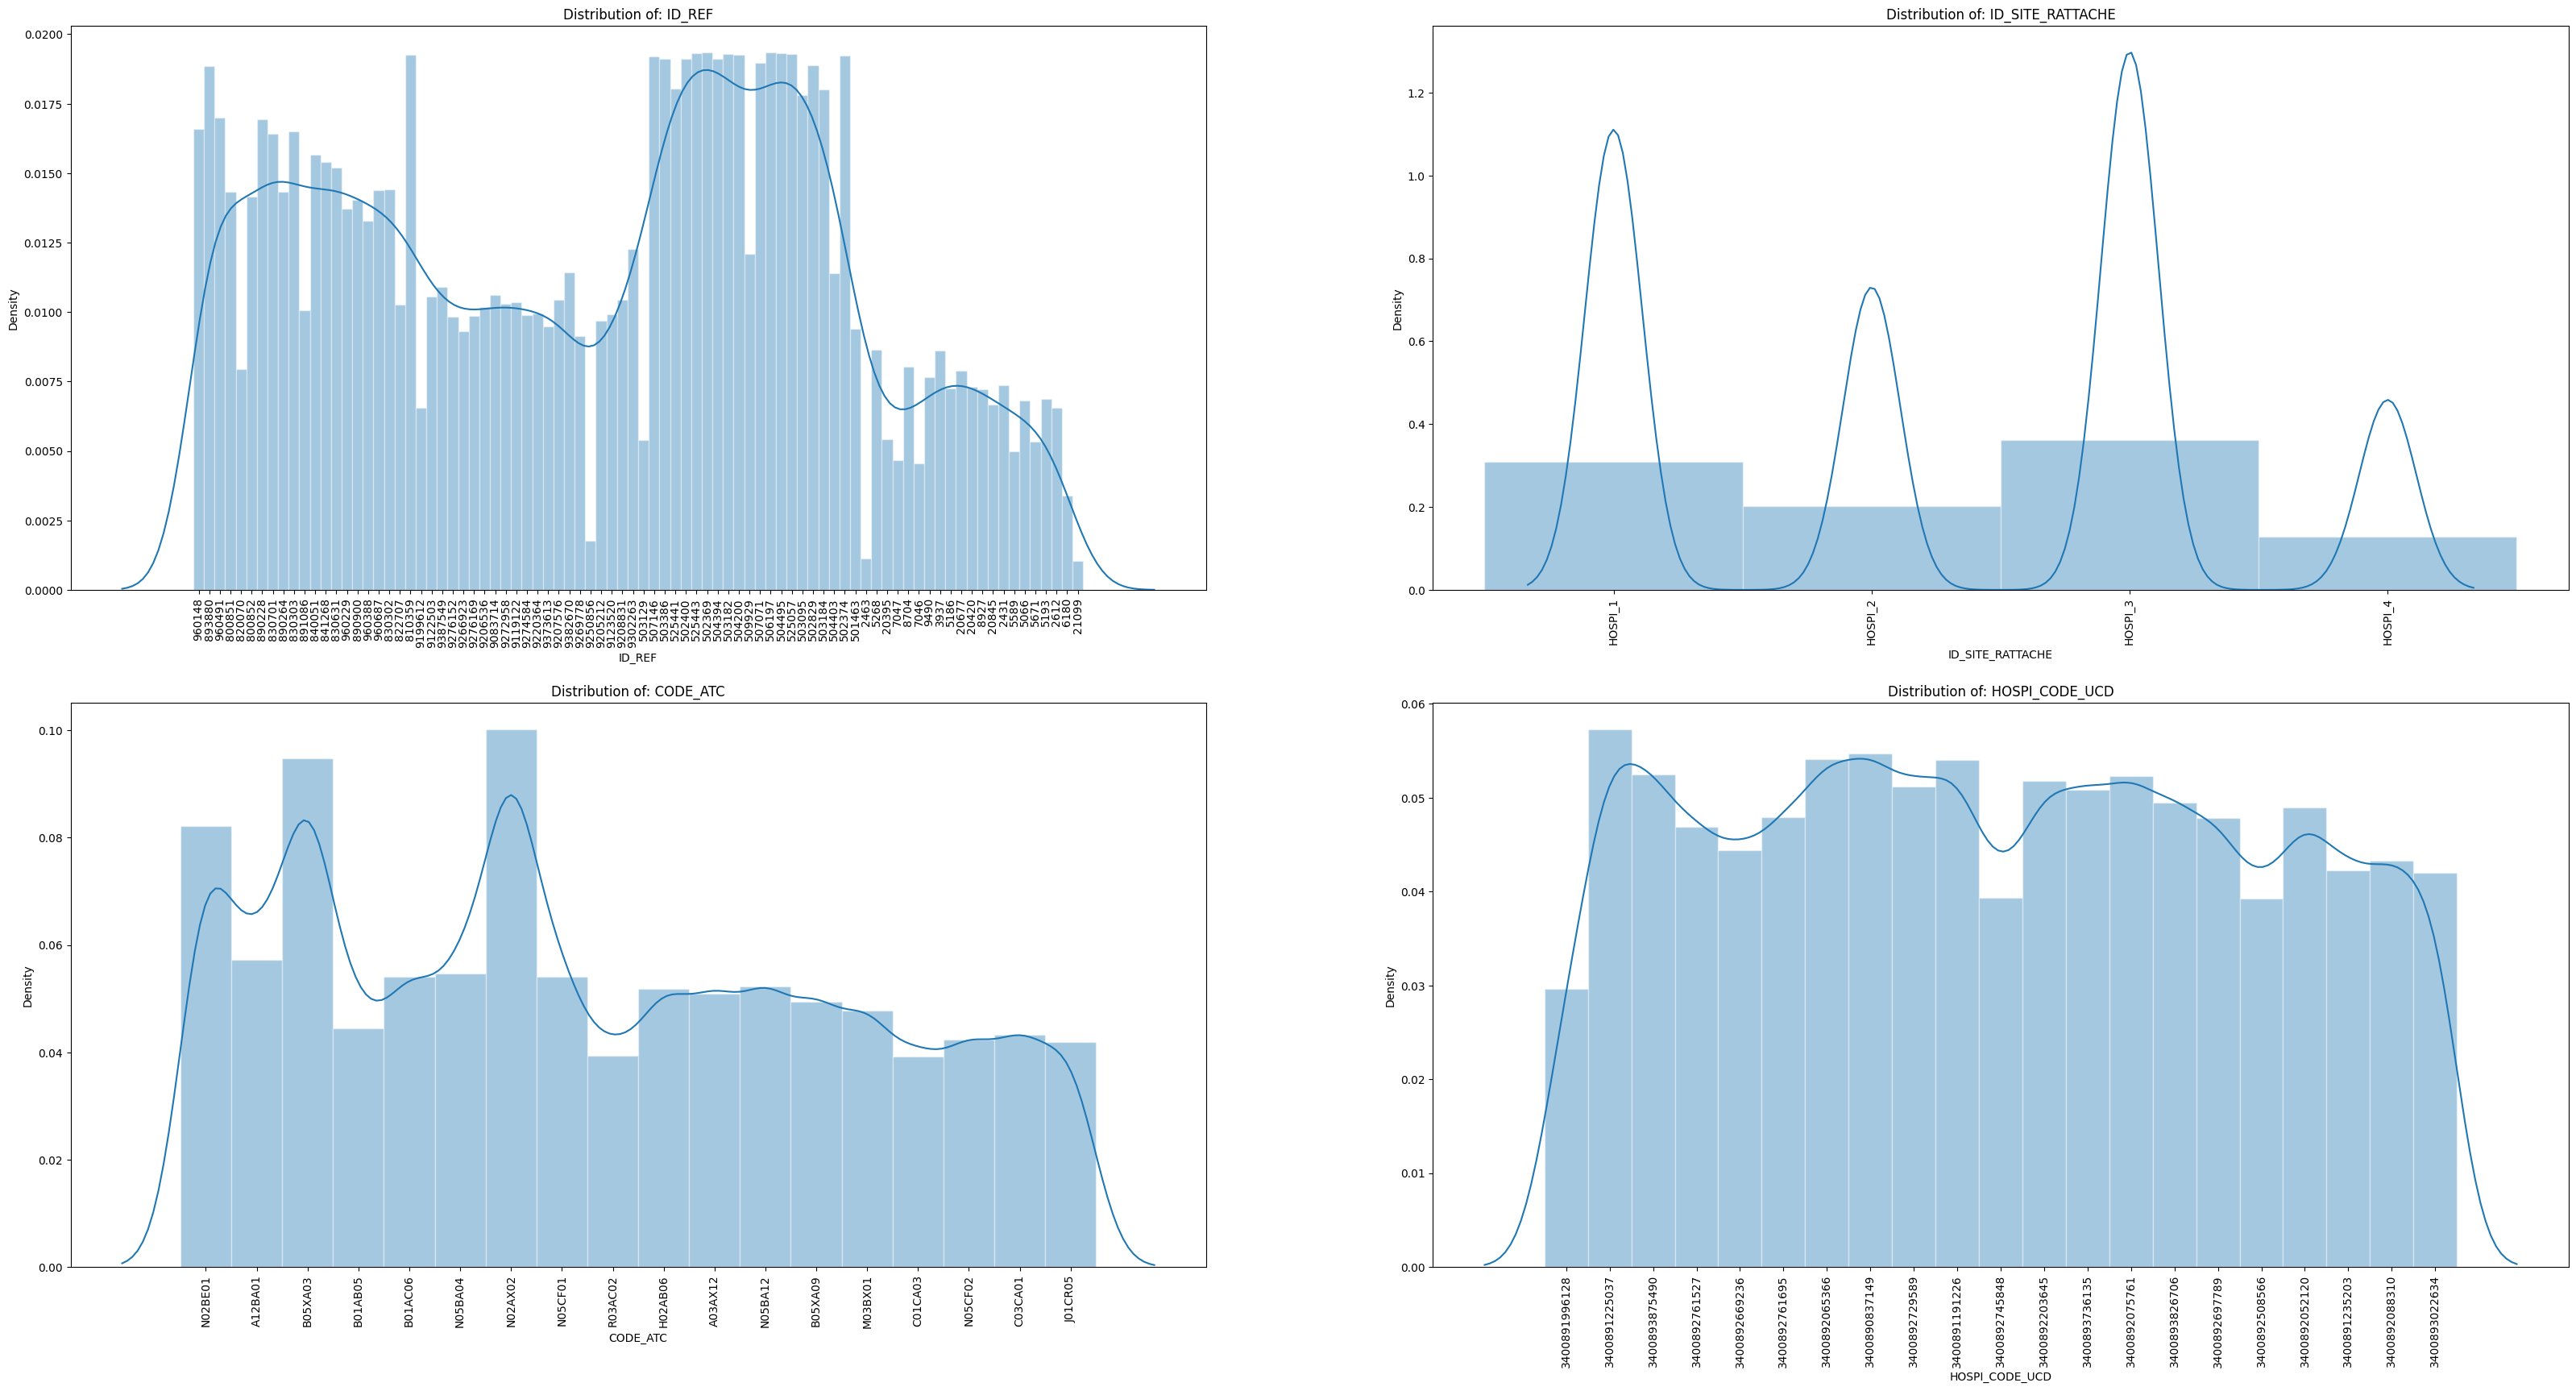

In [87]:
'''
  Plot of distribution for the categorical features
'''

fig, axes = plt.subplots(2, 2,sharex=False, figsize=(40,20))

i = 0
j = 0
for column in categorical_features:
  sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=axes[i, j]).set(title='Distribution of: ' + str(column))
  axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)

  if j == 1:
    i += 1
    j = 0
  else:
    j+=1

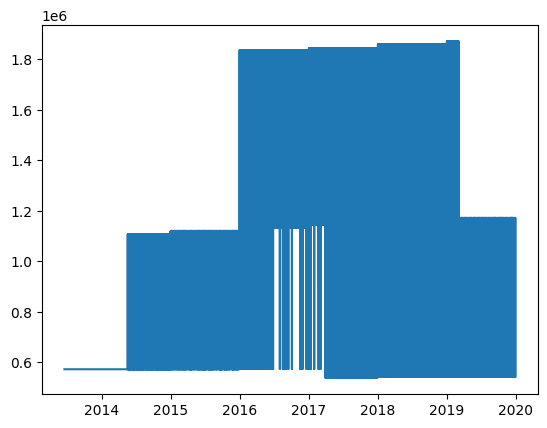

In [169]:
df = df.sort_values(by=['DATE_MOUV'])
x = df.DATE_MOUV
y = df.POPULATION
plt.plot(x,y)

In [95]:
df_modified = df.copy()
change = {'HOSPI_1': '1', 'HOSPI_2': '2', 'HOSPI_3': '3', 'HOSPI_4': '4'}

df_modified["ID_SITE_RATTACHE"] = df_modified['ID_SITE_RATTACHE'].replace(change)
df_modified["ID_SITE_RATTACHE"] = df_modified["ID_SITE_RATTACHE"].astype(int)
df_modified.info()
df_modified.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73225 entries, 0 to 75691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            73225 non-null  string        
 1   ID_SITE_RATTACHE  73225 non-null  int64         
 2   CODE_ATC          73225 non-null  string        
 3   HOSPI_CODE_UCD    73225 non-null  string        
 4   DATE_MOUV         73225 non-null  datetime64[ns]
 5   N_UFS             73225 non-null  int64         
 6   QUANTITY          73225 non-null  float64       
 7   WEEK              73225 non-null  float64       
 8   MONTH             73225 non-null  int64         
 9   YEAR              73225 non-null  float64       
 10  N_ETB             73225 non-null  int64         
 11  POPULATION        73225 non-null  float64       
 12  P_MEDICAL         73225 non-null  int64         
 13  PN_MEDICAL        73225 non-null  int64         
 14  LIT_HC            7322

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
0,960148,1,N02BE01,3400891996128,2013-06-18,1,10.0,25.0,6,2013.0,...,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
1,960148,1,N02BE01,3400891996128,2013-06-28,1,100.0,26.0,6,2013.0,...,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
2,960148,1,N02BE01,3400891996128,2013-07-01,1,100.0,27.0,7,2013.0,...,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
3,960148,1,N02BE01,3400891996128,2013-07-05,1,100.0,27.0,7,2013.0,...,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
4,960148,1,N02BE01,3400891996128,2013-07-08,1,200.0,28.0,7,2013.0,...,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109


In [96]:
df_modified["ID_REF"] = df_modified["ID_REF"].astype(int)
df_modified["HOSPI_CODE_UCD"] = df_modified["HOSPI_CODE_UCD"].astype(int)

change = {'N02BE01':'1','A12BA01':'2','B05XA03':'3',
          'B01AB05':'4','B01AC06':'5','N05BA04':'6',
          'N02AX02':'7','N05CF01':'8','R03AC02':'9',
          'H02AB06':'10','A03AX12':'11','N05BA12':'12',
          'B05XA09':'13','M03BX01':'14','C01CA03':'15',
          'N05CF02':'16','C03CA01':'17','J01CR05':'18'}

df_modified["CODE_ATC"] = df_modified['CODE_ATC'].replace(change)
df_modified["CODE_ATC"] = df_modified["CODE_ATC"].astype(int)

In [97]:
df_modified.drop('DATE_MOUV', axis=1, inplace=True)
df_modified.info()
df_modified.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73225 entries, 0 to 75691
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            73225 non-null  int64  
 1   ID_SITE_RATTACHE  73225 non-null  int64  
 2   CODE_ATC          73225 non-null  int64  
 3   HOSPI_CODE_UCD    73225 non-null  int64  
 4   N_UFS             73225 non-null  int64  
 5   QUANTITY          73225 non-null  float64
 6   WEEK              73225 non-null  float64
 7   MONTH             73225 non-null  int64  
 8   YEAR              73225 non-null  float64
 9   N_ETB             73225 non-null  int64  
 10  POPULATION        73225 non-null  float64
 11  P_MEDICAL         73225 non-null  int64  
 12  PN_MEDICAL        73225 non-null  int64  
 13  LIT_HC            73225 non-null  float64
 14  LIT_HP            73225 non-null  float64
 15  SEJ_MCO           73225 non-null  int64  
 16  SEJ_HAD           73225 non-null  int64 

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,WEEK,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
0,960148,1,1,3400891996128,1,10.0,25.0,6,2013.0,12,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
1,960148,1,1,3400891996128,1,100.0,26.0,6,2013.0,12,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
2,960148,1,1,3400891996128,1,100.0,27.0,7,2013.0,12,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
3,960148,1,1,3400891996128,1,100.0,27.0,7,2013.0,12,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
4,960148,1,1,3400891996128,1,200.0,28.0,7,2013.0,12,571675.0,683,5270,1471.0,112.0,72785,0,0,1049,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75687,21099,4,18,3400893022634,2,250.0,9.0,2,2019.0,39,1871364.0,2639,15774,4530.0,514.0,263011,0,770,8031,172
75688,21099,4,18,3400893022634,1,200.0,9.0,2,2019.0,39,1871364.0,2639,15774,4530.0,514.0,263011,0,770,8031,172
75689,21099,4,18,3400893022634,3,500.0,9.0,2,2019.0,39,1871364.0,2639,15774,4530.0,514.0,263011,0,770,8031,172
75690,21099,4,18,3400893022634,3,650.0,9.0,3,2019.0,39,1871364.0,2639,15774,4530.0,514.0,263011,0,770,8031,172


In [138]:
values = Normalizer().fit_transform(df_modified[numerical_features].values)
values

array([[1.73515567e-06, 1.73515567e-05, 2.08218680e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.82017829e-03],
       [1.73515564e-06, 1.73515564e-04, 2.08218677e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.82017827e-03],
       [1.73515564e-06, 1.73515564e-04, 2.08218677e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.82017827e-03],
       ...,
       [1.58743049e-06, 2.64571748e-04, 2.06365963e-05, ...,
        0.00000000e+00, 4.07440491e-04, 4.24955141e-03],
       [1.58743045e-06, 3.43943264e-04, 2.06365958e-05, ...,
        0.00000000e+00, 4.07440482e-04, 4.24955131e-03],
       [1.58743048e-06, 2.69863182e-04, 2.06365963e-05, ...,
        0.00000000e+00, 4.07440491e-04, 4.24955141e-03]])

In [139]:
from sklearn.cluster import KMeans

import numpy as np



seed = 42
np.random.seed(seed)

model = KMeans(n_clusters = 4, n_init = 10, max_iter = 500)

y_pred  = model.fit_predict(values)

In [136]:
from sklearn import metrics
'''
  The Silhouette Coefficient is calculated using the mean intra-cluster distance (a)
  and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient
  for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and
  the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient
  is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

  This function returns the mean Silhouette Coefficient over all samples. To obtain
  the values for each sample, use silhouette_samples. The best value is 1 and the worst
  value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate
  that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

'''

'''
  Compute the Davies-Bouldin score.
  The score is defined as the average similarity measure of each cluster with its
  most similar cluster, where similarity is the ratio of within-cluster distances to
  between-cluster distances. Thus, clusters which are farther apart and less dispersed
  will result in a better score. The minimum score is zero, with lower values indicating
  better clustering.
'''

'''
  If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score)
  - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz
  score relates to a model with better defined clusters. The index is the ratio of the sum of between-clusters
  dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):
'''


def clustering_algorithms(n_clusters, dataset):
    print(f'N clusters: {n_clusters}')
    model = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
    labels  = model.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset,labels)
    print(f'Silhouette_score: {round(s,2)}')
    print(f'Davies_bouldin_score: {round(dbs,2)}')
    print(f'Calinski_harabasz_score: {round(calinski,2)}')
    return

In [142]:
clustering_algorithms(2, values)
print('-'*100)
clustering_algorithms(3, values)
print('-'*100)
clustering_algorithms(4, values)
print('-'*100)
clustering_algorithms(5, values)
print('-'*100)
clustering_algorithms(6, values)

N clusters: 2
Silhouette_score: 0.83
Davies_bouldin_score: 0.23
Calinski_harabasz_score: 841833.79
----------------------------------------------------------------------------------------------------
N clusters: 3
Silhouette_score: 0.75
Davies_bouldin_score: 0.34
Calinski_harabasz_score: 1136821.27
----------------------------------------------------------------------------------------------------
N clusters: 4
Silhouette_score: 0.71
Davies_bouldin_score: 0.37
Calinski_harabasz_score: 1110192.7
----------------------------------------------------------------------------------------------------
N clusters: 5
Silhouette_score: 0.63
Davies_bouldin_score: 0.53
Calinski_harabasz_score: 1424320.6
----------------------------------------------------------------------------------------------------
N clusters: 6
Silhouette_score: 0.66
Davies_bouldin_score: 0.53
Calinski_harabasz_score: 1665364.47


In [151]:
#Best regarding the 3 metrics
model = KMeans(n_clusters = 2, n_init = 10, max_iter = 500)
labels  = model.fit_predict(values)

<function matplotlib.pyplot.show(close=None, block=None)>

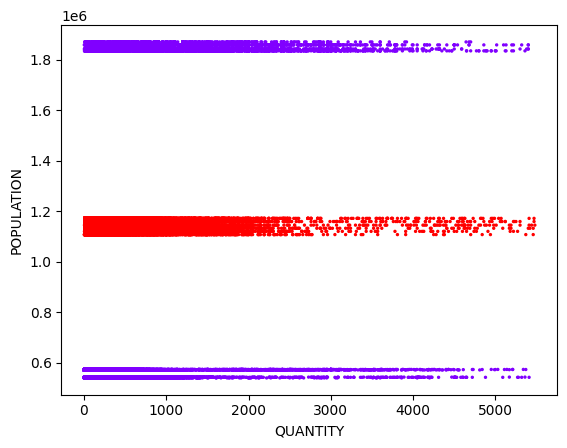

In [153]:
'''
  As saw in the literature and confirmed below, the population
  factor has a strong relationship with the classes assumptions
  to the drugs

'''
labels
plt.scatter(df_modified['QUANTITY'], df_modified['POPULATION'], c=labels, s=2, cmap='rainbow' )
plt.xlabel("QUANTITY")
plt.ylabel("POPULATION")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

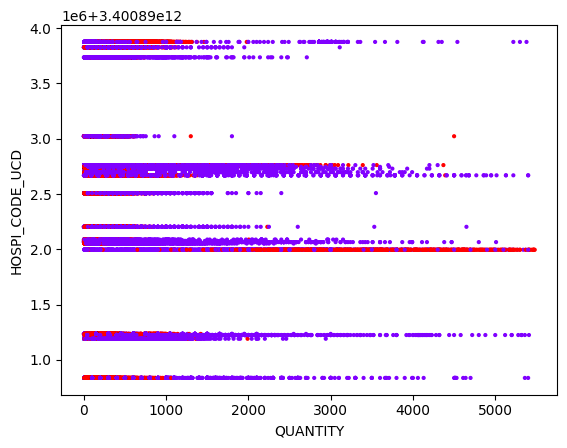

In [154]:
plt.scatter(df_modified['QUANTITY'], df_modified['HOSPI_CODE_UCD'], c=labels, s=4, cmap='rainbow' )
plt.xlabel("QUANTITY")
plt.ylabel("HOSPI_CODE_UCD")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

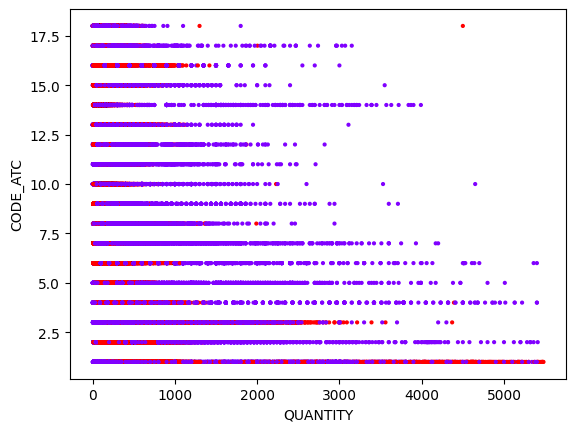

In [155]:
plt.scatter(df_modified['QUANTITY'], df_modified['CODE_ATC'], c=labels, s=4, cmap='rainbow' )
plt.xlabel("QUANTITY")
plt.ylabel("CODE_ATC")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

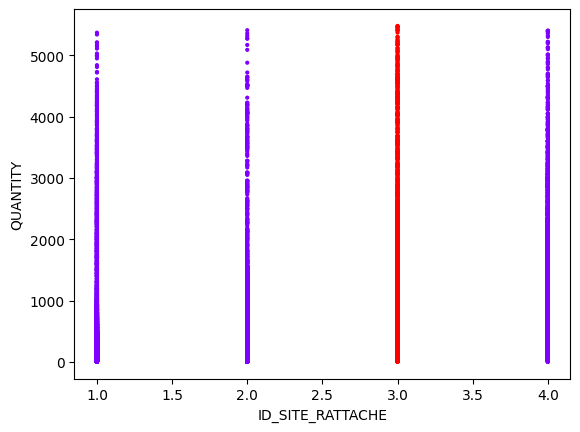

In [156]:
plt.scatter(df_modified['ID_SITE_RATTACHE'], df_modified['QUANTITY'], c=labels, s=4, cmap='rainbow' )
plt.xlabel("ID_SITE_RATTACHE")
plt.ylabel("QUANTITY")
plt.show

In [158]:
df_modified.groupby('cluster').describe()

ID_REF                                                            \
           count          mean           std       min       25%       50%   
cluster                                                                      
0        46797.0  3.358181e+06  4.026491e+06    2431.0  810359.0  890900.0   
1        26428.0  5.075008e+05  7.895353e+03  501463.0  503095.0  504200.0   

                              ID_SITE_RATTACHE            ... SEJ_SSR          \
               75%        max            count      mean  ...     75%     max   
cluster                                                   ...                   
0        9199612.0  9387549.0          46797.0  1.915892  ...  1239.0  8464.0   
1         507071.0   525443.0          26428.0  3.000000  ...  1309.0  1334.0   

         SEJ_SLD                                                          
           count        mean        std   min   25%    50%    75%    max  
cluster                                                                   
0        46797.0   83.417762  81.094586   0.0   0.0   79.0  122.0  285.0  
1        26428.0  103.879333  18.679296  75.0  88.0  118.0  120.0  124.0  

[2 rows x 160 columns]

In [159]:
centroids = model.cluster_centers_
centroids

array([[9.07761231e-06, 5.09039597e-04, 1.71235784e-05, 9.90670535e-01,
        1.30713018e-03, 9.04199534e-03, 2.31456144e-03, 2.31634755e-04,
        1.35823633e-01, 6.47810798e-17, 6.95610541e-04, 2.00589883e-03],
       [7.55426442e-06, 3.91186011e-04, 4.35979003e-05, 9.94678020e-01,
        1.11663845e-03, 6.40202503e-03, 1.77041065e-03, 4.47991037e-04,
        1.02732283e-01, 7.77466190e-04, 2.29791926e-03, 1.07903618e-03]])

In [162]:
max = len(centroids[0])

for i in range(max):
    print(df_modified[numerical_features].columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

N_UFS 
0.0000
QUANTITY 
0.0000
N_ETB 
0.0000
POPULATION 
0.0000
P_MEDICAL 
0.0000
PN_MEDICAL 
0.0000
LIT_HC 
0.0000
LIT_HP 
0.0000
SEJ_MCO 
0.0003
SEJ_HAD 
0.0000
SEJ_PSY 
0.0000
SEJ_SSR 
0.0000


In [165]:
description = df_modified.groupby("cluster")["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL"]
n_drugs = description.size()
description = description.mean()
description['n_drugs'] = n_drugs
description

<ipython-input-165-f4b4af80b71d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df_modified.groupby("cluster")["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL"]


,QUANTITY,POPULATION,P_MEDICAL,PN_MEDICAL,n_drugs
cluster,,,,,
0,427.860226,8.164583e+05,1096.186337,7285.418916,46797
1,449.107954,1.141117e+06,1281.438020,7344.722226,26428
